Ideias: Funções que tragam dados/estatísticas pra quem quiser sobre filmes e também buscar tendências do sucesso <br>
Farei em português

Lista de funções: <br>
dados('Nome do filme'): puxa os principais dados do filme em uma tabela

Dataframes utilizados:<br>
os presentes no segundo input<br>
movies_limpo: movies_metadata sem algumas colunas<br>
movies_comfinanceiro: movies_limpo com receita e orçamento positivos (supondo que não dá pra fazer filme de graça)


In [286]:
import pandas as pd 
import numpy as np
import warnings    #pro pandas não ficar me incomodando
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [287]:
movies_metadata=pd.read_csv('C:/Users/dwsur/projeto comp/dados/the-movies-dataset/movies_metadata.csv')
credits=pd.read_csv('C:/Users/dwsur/projeto comp/dados/the-movies-dataset/credits.csv')
keywords=pd.read_csv('C:/Users/dwsur/projeto comp/dados/the-movies-dataset/keywords.csv')
links=pd.read_csv('C:/Users/dwsur/projeto comp/dados/the-movies-dataset/links.csv')
ratings=pd.read_csv('C:/Users/dwsur/projeto comp/dados/the-movies-dataset/ratings.csv')

In [288]:
filmes_limpo = movies_metadata.drop(['belongs_to_collection','homepage','poster_path','overview','status','spoken_languages'], axis = 1)
#tirando umas colunas que achei meio aleatórias
filmes_limpo = filmes_limpo.rename(columns={
    'adult': 'adulto', 
    'budget': 'orçamento', 
    'original_language': 'lingua original', # BRASIL PORRA!!!!
    'original_title': 'titulo',
    'genres': 'genero',
    'popularity': 'popularidade',
    'production_companies':'produtoras',
    'production_countries':'pais de produçao',
    'release_date':'lançamento',
    'revenue':'receita',
    'runtime':'duraçao',
    'vote_average':'media de votos',
    'vote_count':'numero de votos'})

In [289]:
filmes_limpo.sort_values(by=['adulto'], inplace=True)
#encontrando os filmes com adulto=True
filmes_limpo.head()

,adulto,orçamento,genero,id,imdb_id,lingua original,titulo,popularidade,produtoras,pais de produçao,lançamento,receita,duraçao,tagline,title,video,media de votos,numero de votos
19730,- Written by Ørnås,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,False,6.0,1,nan,nan,NaN,NaN,NaN,nan,nan
35587,Avalanche Sharks tells the story of a bikini ...,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Beware Of Frost Bites,False,4.3,22,nan,nan,NaN,NaN,NaN,nan,nan
29503,Rune Balot goes to a casino connected to the ...,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",NaN,False,7.0,12,nan,nan,NaN,NaN,NaN,nan,nan
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,NaN,Toy Story,False,7.70,5415.00
30300,False,0,"[{'id': 35, 'name': 'Comedy'}]",315850,tt1037714,en,Comedy Central Roast of Flavor Flav,1.49,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-08-12,0.00,90.00,NaN,Comedy Central Roast of Flavor Flav,False,6.40,9.00


In [290]:
filmes_limpo = filmes_limpo.drop([19730,35587,29503])  #protegendo a família tradicional brasileira
filmes_limpo=filmes_limpo.drop(['adulto'],axis=1) #pois se torna redundante
filmes_limpo=filmes_limpo[np.isfinite(filmes_limpo['receita'])]

In [291]:
filmes_limpo.head()

,orçamento,genero,id,imdb_id,lingua original,titulo,popularidade,produtoras,pais de produçao,lançamento,receita,duraçao,tagline,title,video,media de votos,numero de votos
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,NaN,Toy Story,False,7.70,5415.00
30300,0,"[{'id': 35, 'name': 'Comedy'}]",315850,tt1037714,en,Comedy Central Roast of Flavor Flav,1.49,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-08-12,0.00,90.00,NaN,Comedy Central Roast of Flavor Flav,False,6.40,9.00
30301,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",270886,tt3483194,fr,Tu dors Nicole,1.60,"[{'name': 'micro_scope', 'id': 21381}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-08-22,0.00,93.00,NaN,You're Sleeping Nicole,False,6.80,19.00
30302,14500000,"[{'id': 18, 'name': 'Drama'}]",288980,tt2584018,en,Freedom,5.40,"[{'name': 'Production One', 'id': 52859}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-08-21,0.00,98.00,John Newton's Amazing Grace,Freedom,False,5.80,9.00
30303,0,"[{'id': 18, 'name': 'Drama'}]",69352,tt1309178,tr,Bizim Büyük Çaresizliğimiz,0.57,[],"[{'iso_3166_1': 'TR', 'name': 'Turkey'}]",2011-01-01,0.00,102.00,NaN,Our Grand Despair,False,6.00,7.00


In [292]:
pd.set_option('display.float_format', '{:.2f}'.format) #tira o numero em notação científica da receita

In [293]:
for i in list(filmes_limpo['orçamento'].index):
   try: 
      int(i)
   except:
      pd.drop(filmes_limpo.iloc[i, 0], axis=0)

In [294]:
filmes_limpo = filmes_limpo.astype({'orçamento':float,'receita':float})
filmes_limpo.head()

,orçamento,genero,id,imdb_id,lingua original,titulo,popularidade,produtoras,pais de produçao,lançamento,receita,duraçao,tagline,title,video,media de votos,numero de votos
0,30000000.00,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.00,81.00,NaN,Toy Story,False,7.70,5415.00
30300,0.00,"[{'id': 35, 'name': 'Comedy'}]",315850,tt1037714,en,Comedy Central Roast of Flavor Flav,1.49,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-08-12,0.00,90.00,NaN,Comedy Central Roast of Flavor Flav,False,6.40,9.00
30301,0.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",270886,tt3483194,fr,Tu dors Nicole,1.60,"[{'name': 'micro_scope', 'id': 21381}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-08-22,0.00,93.00,NaN,You're Sleeping Nicole,False,6.80,19.00
30302,14500000.00,"[{'id': 18, 'name': 'Drama'}]",288980,tt2584018,en,Freedom,5.40,"[{'name': 'Production One', 'id': 52859}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-08-21,0.00,98.00,John Newton's Amazing Grace,Freedom,False,5.80,9.00
30303,0.00,"[{'id': 18, 'name': 'Drama'}]",69352,tt1309178,tr,Bizim Büyük Çaresizliğimiz,0.57,[],"[{'iso_3166_1': 'TR', 'name': 'Turkey'}]",2011-01-01,0.00,102.00,NaN,Our Grand Despair,False,6.00,7.00


In [295]:
type(filmes_limpo['orçamento'][0])

numpy.float64

In [296]:
def dados(nome):
    dados = filmes_limpo.loc[filmes_limpo['titulo']==nome] #chama os dados de um filme
    return dados

In [297]:
dados('Inception')

,orçamento,genero,id,imdb_id,lingua original,titulo,popularidade,produtoras,pais de produçao,lançamento,receita,duraçao,tagline,title,video,media de votos,numero de votos
15480,160000000.00,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",27205,tt1375666,en,Inception,29.11,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2010-07-14,825532764.00,148.00,Your mind is the scene of the crime.,Inception,False,8.10,14075.00


In [320]:
filmes_comfinanceiro=filmes_limpo.loc[(filmes_limpo['orçamento']>10000)&(filmes_limpo['receita']>100000000)]
filmes_comfinanceiro.sort_values(['orçamento'], ascending=False)

,orçamento,genero,id,imdb_id,lingua original,titulo,popularidade,produtoras,pais de produçao,lançamento,receita,duraçao,tagline,title,video,media de votos,numero de votos
17124,380000000.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1865,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,27.89,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2011-05-14,1045713802.00,136.00,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,False,6.40,5068.00
11827,300000000.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,tt0449088,en,Pirates of the Caribbean: At World's End,31.36,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000.00,169.00,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,False,6.90,4627.00
26558,280000000.00,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",99861,tt2395427,en,Avengers: Age of Ultron,37.38,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-04-22,1405403694.00,141.00,A New Age Has Come.,Avengers: Age of Ultron,False,7.30,6908.00
11067,270000000.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1452,tt0348150,en,Superman Returns,13.28,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-28,391081192.00,154.00,NaN,Superman Returns,False,5.40,1429.00
18685,260000000.00,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,tt0401729,en,John Carter,14.67,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100.00,132.00,"Lost in our world, found in another.",John Carter,False,6.10,2170.00
16130,260000000.00,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",38757,tt0398286,en,Tangled,14.68,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,591794936.00,100.00,They're taking adventure to new lengths.,Tangled,False,7.40,3419.00
44842,260000000.00,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",335988,tt3371366,en,Transformers: The Last Knight,39.186819,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-06-21,604942143.00,149.00,"For one world to live, the other must die.",Transformers: The Last Knight,False,6.20,1440.00
11780,258000000.00,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",559,tt0413300,en,Spider-Man 3,27.61,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626.00,139.00,The battle within.,Spider-Man 3,False,5.90,3687.00
23359,250000000.00,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",127585,tt1877832,en,X-Men: Days of Future Past,26.06,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2014-05-15,747862775.00,131.00,"To save the future, they must alter the past",X-Men: Days of Future Past,False,7.50,6155.00
26567,250000000.00,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",271110,tt3498820,en,Captain America: Civil War,145.88,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-04-27,1153304495.00,147.00,Divided We Fall,Captain America: Civil War,False,7.10,7462.00


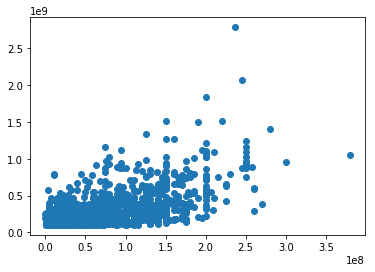

In [318]:
x = filmes_comfinanceiro[['orçamento']]
y = filmes_comfinanceiro[['receita']]

plt.scatter(x,y)
plt.show()